In [1]:
import bt
import pandas as pd
import numpy as np
import datetime
import pybacktest
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
num=100
buy=pd.Series(np.random.randint(0,2,num))  

In [3]:
price=pd.Series(np.random.randint(0,100,num))  

In [4]:
money=1000 # start money
comission=0.002 # trading comission default 0.2%
shares=0
portfolio=[]
benchmark=[]
benchmark_shares=money/price[0]
cost_basis=0
for i in range(0,num):
    if buy[i]:
        if (shares==0):
            shares=money*(1-comission)/price[i]
            print("BUY price %d money %.2f shares %.2f" % (price[i], money, shares))
            cost_basis=price[i]
            money=0
    else:
        if (shares!=0):
            money=(shares*price[i])*(1-comission)
            gain=100*(price[i]/cost_basis-1)
            print("SELL price %d money %.2f shares %.2f gain %.2f%%" % (price[i], money, shares, gain))
            
            shares=0
        
    portfolio.append(money+shares*price[i])   
    benchmark.append(benchmark_shares*price[i])
  

BUY price 44 money 1000.00 shares 22.68
SELL price 52 money 1177.10 shares 22.68 gain 18.18%
BUY price 95 money 1177.10 shares 12.37
SELL price 25 money 308.52 shares 12.37 gain -73.68%
BUY price 38 money 308.52 shares 8.10
SELL price 18 money 145.56 shares 8.10 gain -52.63%
BUY price 10 money 145.56 shares 14.53
SELL price 52 money 753.88 shares 14.53 gain 420.00%
BUY price 45 money 753.88 shares 16.72
SELL price 28 money 467.21 shares 16.72 gain -37.78%
BUY price 55 money 467.21 shares 8.48
SELL price 29 money 245.36 shares 8.48 gain -47.27%
BUY price 95 money 245.36 shares 2.58
SELL price 48 money 123.48 shares 2.58 gain -49.47%
BUY price 72 money 123.48 shares 1.71
SELL price 54 money 92.24 shares 1.71 gain -25.00%
BUY price 95 money 92.24 shares 0.97
SELL price 80 money 77.36 shares 0.97 gain -15.79%
BUY price 24 money 77.36 shares 3.22
SELL price 95 money 305.01 shares 3.22 gain 295.83%
BUY price 68 money 305.01 shares 4.48
SELL price 83 money 370.80 shares 4.48 gain 22.06%
BUY p

(0, 100)

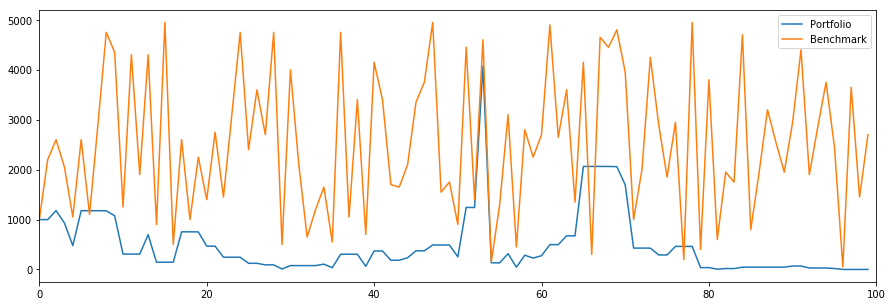

In [8]:
plt.figure(figsize=(15,5))
plt.plot(portfolio, label='Portfolio')
plt.plot(benchmark, label='Benchmark')
plt.legend()
plt.xlim(0,100)